In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset  =  pd.read_csv('Dataset_creation - Sheet1.csv')

In [3]:
y = dataset.iloc[: , -1]

In [4]:
y.shape

(100,)

In [5]:
X = dataset.iloc[: , 0:4]

In [6]:
X.shape

(100, 4)

In [7]:
X.head()

,Resturant ID,Cost for two,Free Home delivery,Locality
0,1,1759,1,Pitampura
1,2,2481,0,Rohini
2,3,2702,1,Greater Noida
3,4,2764,0,Vaishali
4,5,3849,1,Indrapuram


In [8]:
locality = dataset.iloc[: ,3 ]

In [9]:
locality

0            Pitampura
1               Rohini
2        Greater Noida
3             Vaishali
4           Indrapuram
            ...       
95        Punjabi bagh
96    Ashoka Park Main
97       Kashmiri Gate
98       Chandni Chowk
99          Moti Nagar
Name: Locality, Length: 100, dtype: object

In [10]:
# preprocess :  categorical variable
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
locality_new = labelencoder_x.fit_transform(locality)

In [11]:
X.iloc[: , -1] = locality_new

In [12]:
X

,Resturant ID,Cost for two,Free Home delivery,Locality
0,1,1759,1,6
1,2,2481,0,8
2,3,2702,1,2
3,4,2764,0,9
4,5,3849,1,3
...,...,...,...,...
95,96,1340,1,7
96,97,859,1,0
97,98,1475,1,4
98,99,3990,1,1


In [13]:
from sklearn.preprocessing  import OneHotEncoder
from sklearn.compose import ColumnTransformer
# onehotencoder = OneHotEncoder( categorical_features=[-1])
ct = ColumnTransformer([("Country", OneHotEncoder(), [0])], remainder = 'passthrough')
# X = onehotencoder.fit_transform(X).toarray()
X = ct.fit_transform(X)

In [14]:
X = X[: , 1:]

In [15]:
X

<100x102 sparse matrix of type '<class 'numpy.float64'>'
	with 353 stored elements in Compressed Sparse Row format>

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train ,y_train)

LinearRegression()

In [21]:
model.predict(X_test)

array([148597.16343192, 147615.87104439, 135461.07006037, 153875.08682448,
       135390.95204063, 144299.20078931, 112803.5481831 , 138445.27430739,
       134222.59855523, 142433.17487773, 120042.03789674, 147272.42500803,
       159839.45841056, 153291.25412355, 133794.21723771, 120075.62153567,
       109081.34442549, 132707.64861673, 127565.03533014, 143728.5662455 ])

In [22]:
y_test

83    172687
53    166341
70    136539
45    132114
44     65748
39    130522
22    156469
80    131502
10    190971
0      98267
18    151495
30     64394
73    175385
33    165613
90    166579
4     198897
76    138900
77     83151
12    188559
31    136566
Name: Profit, dtype: int64

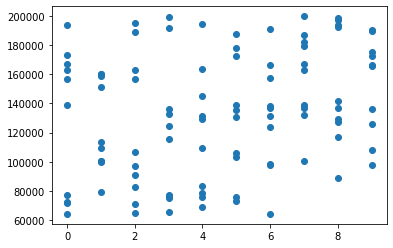

In [23]:
plt.scatter(locality_new, y)



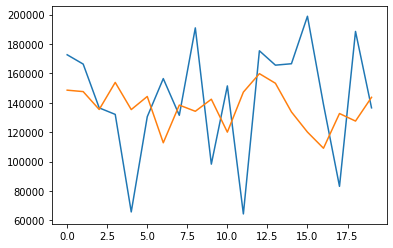

In [28]:
plt.plot(range(len(y_test)),  y_test)
plt.plot(range(len(y_test)), model.predict(X_test))
